<div style="text-align: center; font-size: 30px; font-weight: bold;">
    Assignment/Lab 2: Winter 2025 Group 2
    <br>***
</div>

<h1>Team members</h1>
<b>
    
- Minh Le Nguyen
- Liam Knapp
- Gautam Singh
- Gleb Ignatov

</b>
<br>

---

<div style="text-align: center; font-size: 24px; font-weight: bold;">
    Building Linear and Logistic Regression Models from Scratch
</div>

## I. Objectives

<b>
    
- Implement Linear Regression and Logistic Regression from scratch without using machine learning 
libraries.  
- Understand and apply gradient descent for optimizing model parameters. 
- Evaluate model performance using appropriate performance measures. 
- Use  your  implementation  to  perform  regression  and classification  on  the  datasets  provided  in  
separate files. 
- Compare your custom implementations with scikit-learn’s built-in models. 
- Reflect on challenges encountered and key takeaways from implementing regression models 
manually.
    
</b>

**Note: Intructions Details at the bottoms**

### *Formulas

<b>

1. [Linear Regression](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-supervised-learning#linear-models)

2. [Logistic Regression](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-supervised-learning#linear-models)

</b>

---

## II. Implementation

### Set up your Python development environment

In [1]:
!pip install numpy pandas scipy matplotlib


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.linear_model import LinearRegression

---

### Step 1: Implement the Linear Regression Algorithm        

In [3]:
class Linear_Regression:
    """
    A custom implementation of the LinearRegression algorithm for regression tasks.
    
    This class supports training on input features and corresponding target values, 
    and predicting target values for new input data.

    Attributes:
        TrainX (numpy.ndarray): Placeholder for training input features.
        TrainY (numpy.ndarray): Placeholder for training target values.

    Methods:
        fit(x, y):
            Trains the regressor using the provided input features (x) and target values (y).
            Calculates the Slope and Intercept of the training data.
        
        predict(x):
            Predicts target values for a given set of input features (x)
            Returns the predictions as a numpy array.
    """
    def fit(self, x, y):
        self.TrainX = np.array(x)
        self.TrainY = np.array(y)

        # Compute means
        xmean = np.mean(self.TrainX)
        ymean = np.mean(self.TrainY)

        # Compute numerator and denominator
        numerator = sum((xi - xmean) * (yi - ymean) for xi, yi in zip(self.TrainX, self.TrainY))
        denominator = sum((xi - xmean) ** 2 for xi in self.TrainX)

        # Compute slope and intercept
        self.slope = numerator / denominator
        self.intercept = ymean - (self.slope * xmean)

    
    def predict(self, x):
        x = np.array(x)
        # Vectorized calculation
        predictions = self.slope * x + self.intercept
        return predictions
    
    def _display_formula(self):
        return f"y = {self.slope:.2f}x + {self.intercept:.2f}"
    
    def plot_regression_line(self, x_max=10, predictions=None, labels=None, train_x=None, train_y=None):
        """
        Plots the regression line y = slope * x + intercept using x values from 0 to x_max.
        If predictions and labels are provided and valid, plots them as scatter points.
        If training data is provided, it plots them as well.

        Parameters:
            x_max (int): The maximum x value to plot (default: 10).
            predictions (list or None): Optional list of predicted y-values.
            labels (list or None): Optional list of actual y-values.
            train_x (list or None): Optional list of training x-values.
            train_y (list or None): Optional list of training y-values.

        Returns:
            None: Displays a Matplotlib figure.
        """
        x_values = np.arange(0, x_max + 1, 1)
        y_values = self.slope * x_values + self.intercept  

        plt.figure(figsize=(8, 6))

        # Plot the regression line
        plt.plot(x_values, y_values, linestyle='-', color='red', label=f"y = {self.slope:.5f}x + {self.intercept:.5f}")

        # Plot training data points if not None
        if train_x is not None and train_y is not None:
            if isinstance(train_x, (np.ndarray, list)) and isinstance(train_y, (np.ndarray, list)) and len(train_x) == len(train_y):
                plt.scatter(train_x, train_y, color='blue', label='Training Data', alpha=0.8, s=80, edgecolor='black', linewidth=1.2, zorder=5)

        # Plot predicted points for validation if not None
        if predictions is not None and labels is not None:
            if isinstance(predictions, (np.ndarray, list)) and isinstance(labels, (np.ndarray, list)) and len(predictions) == len(labels):
                plt.scatter(labels, predictions, color='green', label='Predicted Points', alpha=0.7, s=100, zorder=5, edgecolor='black', linewidth=1.5)

        # Label axes, title, and show grid/legend
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title("Regression Line Plot")
        plt.legend()
        plt.grid(True)
        plt.show()

### Stub to test Linear Regression implemented

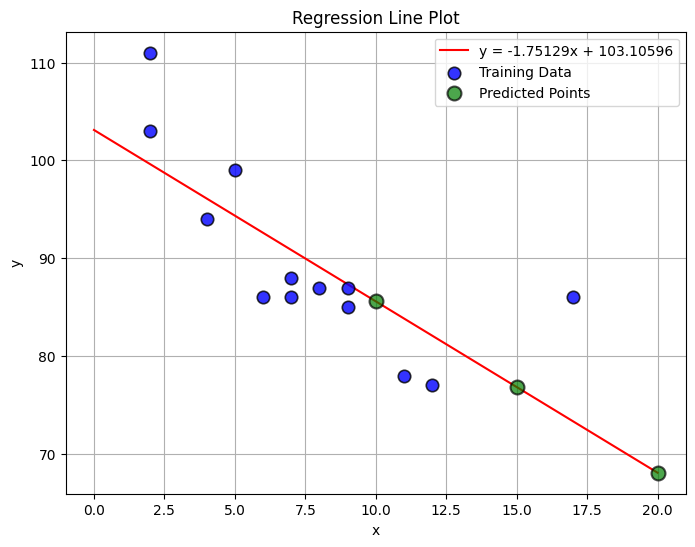

Regression Formula: y = -1.75x + 103.11
Predicted Y values: [85.59308315 76.83664459 68.08020603]


In [4]:
# Training data
TrainX = [5, 7, 8, 7, 2, 17, 2, 9, 4, 11, 12, 9, 6]
TrainY = [99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86]

# Test data
test_x = [10, 15, 20]

# Initialize and train the model
model = Linear_Regression()
model.fit(TrainX, TrainY)

# Make predictions
predictions = model.predict(test_x)

# Plot regression line with predictions
model.plot_regression_line(x_max=20, predictions=predictions, labels=test_x, train_x=TrainX, train_y=TrainY)

print("Regression Formula:", model._display_formula())
print("Predicted Y values:", predictions)

---

### Step 2: Load the Dataset 
(training_dataset_linear.csv and validation_dataset_linear.csv)    

In [5]:
def step_2_load_dataset(file_path="dataset/training_dataset_linear.csv", validation_file_path="dataset/validation_dataset_linear.csv"):
    """
    Load the dataset and display useful information about the dataset
    
    Args:
        file_path (str): Path to the CSV file containing the training dataset.
        validation_file_path (str): Path to the CSV file containing the validation dataset.
        
    Returns:
        trainData (DataFrame):  Pandas dataframe containing the training dataset.
        validationData (DataFrame): Pandas dataframe containing the validation dataset.
    """
    
    
    trainData = pd.read_csv(file_path)
    validationData = pd.read_csv(validation_file_path)

    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.max_colwidth')

    print("Training Data Preview:")
    print(trainData.head())
    
    print("\nValidation Data Preview:")
    print(validationData.head())

    print("\nTraining Data Info:")
    print(trainData.info())
    
    print("\nValidation Data Info:")
    print(validationData.info())
    
    print("\nTraining Data Summary Statistics:")
    print(trainData.describe())
    
    print("\nValidation Data Summary Statistics:")
    print(validationData.describe())

    print("\nMissing Values in Training Data:")
    print(trainData.isnull().sum())
    
    print("\nMissing Values in Validation Data:")
    print(validationData.isnull().sum())

    print("\nDuplicate Rows in Training Data:", trainData.duplicated().sum())
    print("Duplicate Rows in Validation Data:", validationData.duplicated().sum())

    print("\nTraining Data Types:")
    print(trainData.dtypes)
    
    print("\nValidation Data Types:")
    print(validationData.dtypes)

    return trainData, validationData

Train_Data, Validation_Data = step_2_load_dataset()

Training Data Preview:
       x       y
0  1.730  72.851
1  1.184  35.511
2  0.169   0.525
3  0.355   9.269
4  0.250  13.250

Validation Data Preview:
       x       y
0  2.443  89.705
1  0.603  20.943
2  1.137  38.205
3  0.156  14.009
4  0.163   8.761

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       80 non-null     float64
 1   y       80 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB
None

Validation Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       20 non-null     float64
 1   y       20 non-null     float64
dtypes: float64(2)
memory usage: 452.0 bytes
None

Training Data Summary Statistics:
               x          y
count  80.000000  80.000000
mean    0.821150 

Outliers detected by Z-score in Train 'x':
        x       y
64  2.712  83.594
------------------------------------------

Outliers detected by IQR in Train 'x':
        x       y
64  2.712  83.594
------------------------------------------
Outliers detected by Z-score in Train 'y':
Empty DataFrame
Columns: [x, y]
Index: []
------------------------------------------

Outliers detected by IQR in Train 'y':
Empty DataFrame
Columns: [x, y]
Index: []
------------------------------------------
Outliers detected by Z-score in Validate 'x':
Empty DataFrame
Columns: [x, y]
Index: []
------------------------------------------

Outliers detected by IQR in Validate 'x':
Empty DataFrame
Columns: [x, y]
Index: []
------------------------------------------
Outliers detected by Z-score in Validate 'y':
Empty DataFrame
Columns: [x, y]
Index: []
------------------------------------------

Outliers detected by IQR in Validate 'y':
       x       y
0  2.443  89.705
---------------------------------------

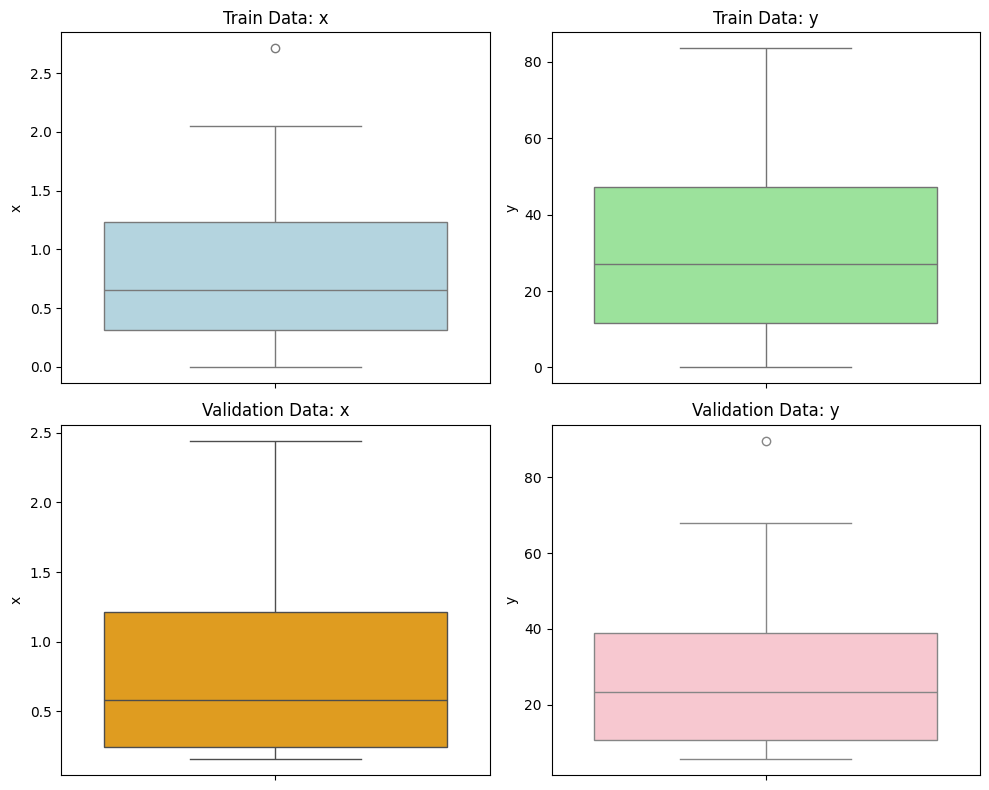

In [6]:
def detect_outliers_zscore(df, column, threshold=3):
    """
    Detects outliers using Z-score method.

    Parameters:
        df (pd.DataFrame): The input dataframe.
        column (str): The column name to check for outliers.
        threshold (float): The Z-score threshold for outlier detection.

    Returns:
        pd.DataFrame: A dataframe containing only the outliers.
    """
    z_scores = np.abs(stats.zscore(df[column]))
    return df[z_scores > threshold]

def detect_outliers_iqr(df, column):
    """
    Detects outliers using the IQR method.

    Parameters:
        df (pd.DataFrame): The input dataframe.
        column (str): The column name to check for outliers.

    Returns:
        pd.DataFrame: A dataframe containing only the outliers.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

def plot_train_and_validation_data_boxplots(Train_Data, validation_data):
    """
    Plots four box plots in a 2x2 grid comparing
    for the provided Train_Data and Validation_Data DataFrames.

    Parameters:
        Train_Data (pd.DataFrame): DataFrame containing 'Train_Data' columns for the dataset.
        validation_data (pd.DataFrame): DataFrame containing columns for the validation dataset.

    Returns:
        None: Displays a Matplotlib figure with four box plots.
    """
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 grid of plots

    # Box plot for x in Train_Data
    sns.boxplot(y=Train_Data['x'], ax=axes[0, 0], color='lightblue')
    axes[0, 0].set_title('Train Data: x')

    # Box plot for y in Train_Data
    sns.boxplot(y=Train_Data['y'], ax=axes[0, 1], color='lightgreen')
    axes[0, 1].set_title('Train Data: y')

    # Box plot for x in Validation_Data
    sns.boxplot(y=validation_data['x'], ax=axes[1, 0], color='orange')
    axes[1, 0].set_title('Validation Data: x')

    # Box plot for y in Validation_Data
    sns.boxplot(y=validation_data['y'], ax=axes[1, 1], color='pink')
    axes[1, 1].set_title('Validation Data: y')

    plt.tight_layout()
    plt.show()

outliers_zscore_x_train = detect_outliers_zscore(Train_Data, 'x')
outliers_iqr_x_train = detect_outliers_iqr(Train_Data, 'x')
outliers_zscore_y_train = detect_outliers_zscore(Train_Data, 'y')
outliers_iqr_y_train = detect_outliers_iqr(Train_Data, 'y')

outliers_zscore_x_validate = detect_outliers_zscore(Validation_Data, 'x')
outliers_iqr_x_validate = detect_outliers_iqr(Validation_Data, 'x')
outliers_zscore_y_validate = detect_outliers_zscore(Validation_Data, 'y')
outliers_iqr_y_validate = detect_outliers_iqr(Validation_Data, 'y')

print("Outliers detected by Z-score in Train 'x':")
print(outliers_zscore_x_train)
print("------------------------------------------")
print("\nOutliers detected by IQR in Train 'x':")
print(outliers_iqr_x_train)
print("------------------------------------------")

print("Outliers detected by Z-score in Train 'y':")
print(outliers_zscore_y_train)
print("------------------------------------------")
print("\nOutliers detected by IQR in Train 'y':")
print(outliers_iqr_y_train)
print("------------------------------------------")

print("Outliers detected by Z-score in Validate 'x':")
print(outliers_zscore_x_validate)
print("------------------------------------------")
print("\nOutliers detected by IQR in Validate 'x':")
print(outliers_iqr_x_validate)
print("------------------------------------------")

print("Outliers detected by Z-score in Validate 'y':")
print(outliers_zscore_y_validate)
print("------------------------------------------")
print("\nOutliers detected by IQR in Validate 'y':")
print(outliers_iqr_y_validate)
print("------------------------------------------")

plot_train_and_validation_data_boxplots(Train_Data, Validation_Data)

---

### Step 3: Train the Linear Regression Model

In [7]:
def step_3_train_linear_model(TrainData):
    """
    Load the dataset, prepare the features and target values, and train a LinearRegression model.
    
    Args:
        TrainData (pandas dataframe): Pandas dataframe containing the dataset.
        
    Returns:
        linear_model (LinearRegression): Trained LinearRegression model.
        TrainX (numpy.ndarray): Input features (Train x) used for training.
        TrainY (numpy.ndarray): Target values (Train Y) used for training.
    """
    
    # Separate the data into features (X) and target values (Y)
    TrainX = TrainData["x"].values  # Convert to numpy array and reshape for the model
    TrainY = TrainData["y"].values  # Training Y values

    # Instantiate the LinearRegression class
    linear_model = Linear_Regression()

    # Fit the model with the training data
    linear_model.fit(TrainX, TrainY)
    
    return linear_model, TrainX, TrainY

linear_model, TrainX, TrainY = step_3_train_linear_model(Train_Data)
print(linear_model._display_formula())

y = 33.32x + 4.41


---

### Step 4: Test and Evaluate the Linear Regression Model

#### A, Calculate the RMSE by Numpy

In [8]:
def calculate_rmse(predictions, actuals):
    """
    Calculate the Root Mean Squared Error (RMSE).
    
    Args:
        predictions (numpy.ndarray): Predicted values.
        actuals (numpy.ndarray): Actual target values.
        
    Returns:
        float: The RMSE value.
    """
    return np.sqrt(np.mean((predictions - actuals) ** 2))

#### B, Calculate the MAE by Numpy

In [9]:
def calculate_mae(predictions, actuals):
    """
    Calculate the Mean Absolute Error (MAE).
    
    Args:
        predictions (numpy.ndarray): Predicted values.
        actuals (numpy.ndarray): Actual target values.
        
    Returns:
        float: The MAE value.
    """
    return np.mean(np.abs(predictions - actuals))

#### C, Define Predict Function

In [10]:
def step_4_predict(linear_model, ValidationData):
    """
    Predict the target values for the validation set using the trained model.
    
    Args:
        linear_model (LinearRegression): Trained LinearRegression model.
        ValidationData (pandas.DataFrame): Pandas dataframe containing the validation set features.
        
    Returns:
        ValidationX (numpy.ndarray): Input features (Validation x) used for prediction.
        predictions (numpy.ndarray): Predicted target values for the validation set.
    """
    # Extract validation features
    ValidationX = ValidationData["x"].values

    # Predict using the trained model
    predictions = linear_model.predict(ValidationX)
    
    return ValidationX, predictions

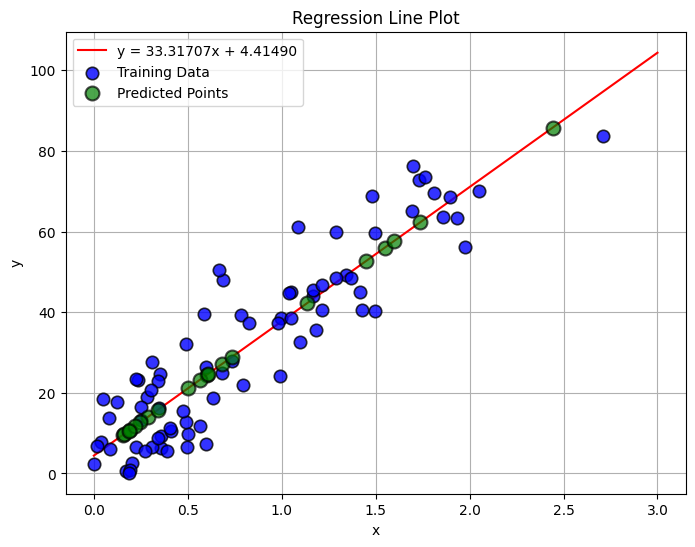

y = 33.32x + 4.41
Validation Set Predictions:
x = 2.443, Predicted y = 85.81, Actual y = 89.70
x = 0.603, Predicted y = 24.51, Actual y = 20.94
x = 1.137, Predicted y = 42.30, Actual y = 38.20
x = 0.156, Predicted y = 9.61, Actual y = 14.01
x = 0.163, Predicted y = 9.85, Actual y = 8.76
x = 0.502, Predicted y = 21.14, Actual y = 22.37
x = 0.682, Predicted y = 27.14, Actual y = 30.04
x = 0.286, Predicted y = 13.94, Actual y = 5.55
x = 1.548, Predicted y = 55.99, Actual y = 67.94
x = 0.191, Predicted y = 10.78, Actual y = 7.52
x = 0.247, Predicted y = 12.64, Actual y = 9.45
x = 0.22, Predicted y = 11.74, Actual y = 11.14
x = 0.734, Predicted y = 28.87, Actual y = 28.11
x = 1.736, Predicted y = 62.25, Actual y = 59.36
x = 1.45, Predicted y = 52.72, Actual y = 41.20
x = 0.563, Predicted y = 23.17, Actual y = 24.23
x = 0.34, Predicted y = 15.74, Actual y = 13.42
x = 1.6, Predicted y = 57.72, Actual y = 58.86
x = 0.606, Predicted y = 24.61, Actual y = 37.58
x = 0.186, Predicted y = 10.61, Ac

In [11]:
ValidationX, predictions = step_4_predict(linear_model, Validation_Data)

# Plot the regression line, training data, and validation predictions
linear_model.plot_regression_line(x_max=max(max(TrainX), max(ValidationX)), 
                                  labels=ValidationX, predictions=predictions, train_x=TrainX, train_y=TrainY)
print(linear_model._display_formula())
print("Validation Set Predictions:")
for x, y_pred, y_actual in zip(ValidationX, predictions, Validation_Data["y"].values):
    print(f"x = {x}, Predicted y = {y_pred:.2f}, Actual y = {y_actual:.2f}")

#### D, Calculate the RMSE and MAE of Model

In [12]:
rmse = calculate_rmse(predictions, Validation_Data["y"].values)
mae = calculate_mae(predictions, Validation_Data["y"].values)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 5.62
MAE: 4.18


#### E, Drop the outliers in training and validation dataset

Boxplot Data After Outliers Removal


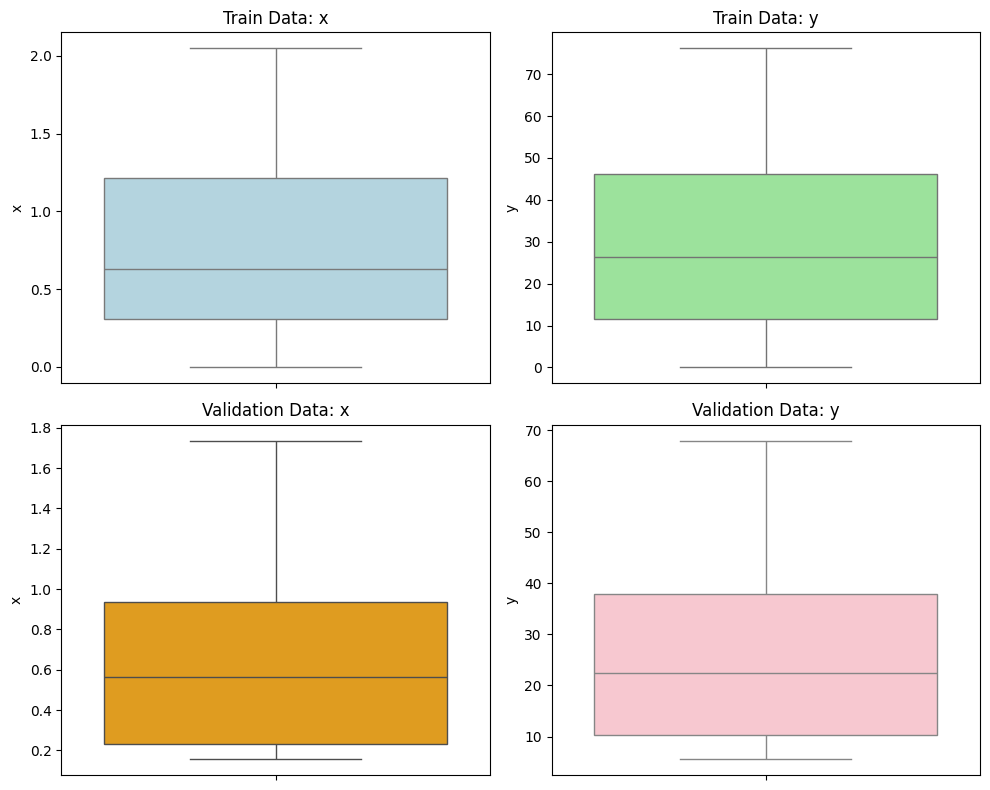

In [13]:
def drop_outliers_iqr(df):
    """
    Removes outliers from all numeric columns in the DataFrame using the IQR method.

    Parameters:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A DataFrame with outliers removed from all numeric columns.
    """
    # Iterate through all numeric columns
    for column in df.select_dtypes(include=['float', 'int']).columns:
        outliers = detect_outliers_iqr(df, column)
        # Drop outliers from the DataFrame
        df = df.drop(outliers.index, axis=0)
    return df

Train_Data_cleaned = drop_outliers_iqr(Train_Data)
Validation_Data_cleaned = drop_outliers_iqr(Validation_Data)
print("Boxplot Data After Outliers Removal")
plot_train_and_validation_data_boxplots(Train_Data_cleaned, Validation_Data_cleaned)

#### F, Train New Model with Cleanned Dataset and Re-Validate the model with Clenned Validate Dataset 

y = 34.13x + 3.90


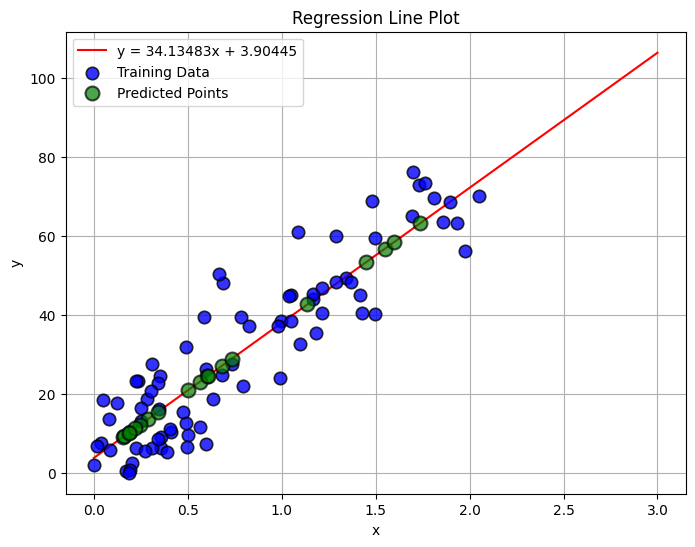

y = 34.13x + 3.90
Validation Set Predictions:
x = 0.603, Predicted y = 24.49, Actual y = 20.94
x = 1.137, Predicted y = 42.72, Actual y = 38.20
x = 0.156, Predicted y = 9.23, Actual y = 14.01
x = 0.163, Predicted y = 9.47, Actual y = 8.76
x = 0.502, Predicted y = 21.04, Actual y = 22.37
x = 0.682, Predicted y = 27.18, Actual y = 30.04
x = 0.286, Predicted y = 13.67, Actual y = 5.55
x = 1.548, Predicted y = 56.75, Actual y = 67.94
x = 0.191, Predicted y = 10.42, Actual y = 7.52
x = 0.247, Predicted y = 12.34, Actual y = 9.45
x = 0.22, Predicted y = 11.41, Actual y = 11.14
x = 0.734, Predicted y = 28.96, Actual y = 28.11
x = 1.736, Predicted y = 63.16, Actual y = 59.36
x = 1.45, Predicted y = 53.40, Actual y = 41.20
x = 0.563, Predicted y = 23.12, Actual y = 24.23
x = 0.34, Predicted y = 15.51, Actual y = 13.42
x = 1.6, Predicted y = 58.52, Actual y = 58.86
x = 0.606, Predicted y = 24.59, Actual y = 37.58
x = 0.186, Predicted y = 10.25, Actual y = 8.30


In [14]:
# Train a new linear model using the cleaned training data
linear_model_data_cleanned, TrainX_cleanned, TrainY_cleanned = step_3_train_linear_model(Train_Data_cleaned)
print(linear_model_data_cleanned._display_formula())

# Re-calculate predictions and metrics
ValidationX_cleanned, predictions_cleanned = step_4_predict(linear_model_data_cleanned, Validation_Data_cleaned)

# Plot the regression line, training data, and validation predictions
linear_model_data_cleanned.plot_regression_line(x_max=max(max(TrainX), max(ValidationX_cleanned)), 
                                  labels=ValidationX_cleanned, predictions=predictions_cleanned, train_x=TrainX_cleanned, train_y=TrainY_cleanned)
print(linear_model_data_cleanned._display_formula())
print("Validation Set Predictions:")
for x, y_pred, y_actual in zip(ValidationX_cleanned, predictions_cleanned, Validation_Data_cleaned["y"].values):
    print(f"x = {x}, Predicted y = {y_pred:.2f}, Actual y = {y_actual:.2f}")

#### G, Recalculate the RMSE and MAE (Cleanned Data)

In [15]:
rmse_cleanned = calculate_rmse(predictions_cleanned, Validation_Data_cleaned["y"].values)
mae_cleanned = calculate_mae(predictions_cleanned, Validation_Data_cleaned["y"].values)
print(f"RMSE (Cleanned Dataset): {rmse_cleanned:.2f}")
print(f"MAE (Cleanned Dataset): {rmse_cleanned:.2f}")

RMSE (Cleanned Dataset): 5.70
MAE (Cleanned Dataset): 5.70


#### H, Train New Model with LinearRegression from Scikitlearn library and Re-Validate the model with LinearRegression from Scikitlearn library

In [16]:
def train_linear_model_scikit_learn(TrainData):
    """
    Train a LinearRegression model using the provided training data.

    Args:
        TrainData (pd.DataFrame): DataFrame containing the training data.

    Returns:
        linear_model (LinearRegression): Trained LinearRegression model.
        TrainX (np.ndarray): Training features (x values).
        TrainY (np.ndarray): Training targets (y values).
    """
    TrainX = TrainData["x"].values.reshape(-1, 1)
    TrainY = TrainData["y"].values

    linear_model = LinearRegression()
    linear_model.fit(TrainX, TrainY)
    return linear_model, TrainX, TrainY

def predict_using_scikit_learn(linear_model, ValidationData):
    """
    Predict target values for the validation set using the trained model.

    Args:
        linear_model (LinearRegression): Trained LinearRegression model.
        ValidationData (pd.DataFrame): DataFrame containing the validation data.

    Returns:
        ValidationX (np.ndarray): Validation features (x values).
        predictions (np.ndarray): Predicted y values for the validation set.
    """
    # Reshape to 2D array for sklearn
    ValidationX = ValidationData["x"].values.reshape(-1, 1)  
    predictions = linear_model.predict(ValidationX)
    return ValidationX, predictions

def display_formula_scikit_learn(linear_model):
    """
    Display the regression formula based on the LinearRegression model.

    Args:
        linear_model (LinearRegression): Trained LinearRegression model.

    Returns:
        str: The regression formula as a string.
    """
    slope = linear_model.coef_[0]
    intercept = linear_model.intercept_
    return f"y = {slope:.2f}x + {intercept:.2f}"

def plot_regression_line_scikit_learn(linear_model, TrainX, TrainY, ValidationX, predictions):
    """
    Plot the regression line, training data, and validation predictions.

    Args:
        linear_model (LinearRegression): Trained LinearRegression model.
        TrainX (np.ndarray): Training features (x values).
        TrainY (np.ndarray): Training target values (y values).
        ValidationX (np.ndarray): Validation features (x values).
        predictions (np.ndarray): Predicted y values for the validation set.
    """
    # Generate line points
    x_range = np.linspace(min(TrainX.min(), ValidationX.min()), max(TrainX.max(), ValidationX.max()), 100)
    y_range = linear_model.predict(x_range.reshape(-1, 1))

    # Plot regression line
    plt.figure(figsize=(8, 6))
    plt.plot(x_range, y_range, color="red", label="Regression Line")

    # Plot training data
    plt.scatter(TrainX, TrainY, color="blue", label="Training Data")

    # Plot validation predictions
    plt.scatter(ValidationX, predictions, color="green", label="Validation Predictions", marker="o", s=100)

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Regression Line with Training and Validation Data")
    plt.legend()
    plt.grid(True)
    plt.show()

#### I, Train New Model and Re-Validate the model with LinearRegression from scikit_learn library

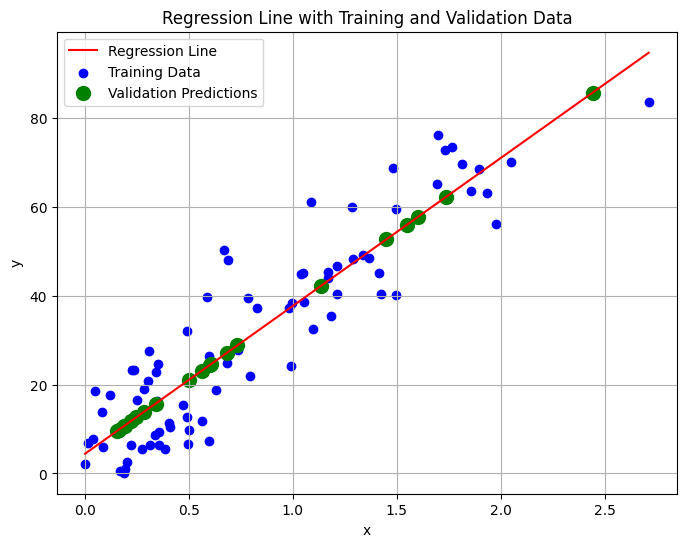

y = 33.32x + 4.41
Validation Set Predictions:
x = 2.443, Predicted y = 85.81, Actual y = 89.70
x = 0.603, Predicted y = 24.51, Actual y = 20.94
x = 1.137, Predicted y = 42.30, Actual y = 38.20
x = 0.156, Predicted y = 9.61, Actual y = 14.01
x = 0.163, Predicted y = 9.85, Actual y = 8.76
x = 0.502, Predicted y = 21.14, Actual y = 22.37
x = 0.682, Predicted y = 27.14, Actual y = 30.04
x = 0.286, Predicted y = 13.94, Actual y = 5.55
x = 1.548, Predicted y = 55.99, Actual y = 67.94
x = 0.191, Predicted y = 10.78, Actual y = 7.52
x = 0.247, Predicted y = 12.64, Actual y = 9.45
x = 0.22, Predicted y = 11.74, Actual y = 11.14
x = 0.734, Predicted y = 28.87, Actual y = 28.11
x = 1.736, Predicted y = 62.25, Actual y = 59.36
x = 1.45, Predicted y = 52.72, Actual y = 41.20
x = 0.563, Predicted y = 23.17, Actual y = 24.23
x = 0.34, Predicted y = 15.74, Actual y = 13.42
x = 1.6, Predicted y = 57.72, Actual y = 58.86
x = 0.606, Predicted y = 24.61, Actual y = 37.58
x = 0.186, Predicted y = 10.61, Ac

In [17]:
linear_model_scikit_learn, TrainX_scikit_learn, TrainY_scikit_learn = train_linear_model_scikit_learn(Train_Data)
ValidationX_scikit_learn, predictions_scikit_learn = predict_using_scikit_learn(linear_model_scikit_learn, Validation_Data)
plot_regression_line_scikit_learn(linear_model_scikit_learn, TrainX_scikit_learn, TrainY_scikit_learn, ValidationX_scikit_learn, predictions_scikit_learn)
print(display_formula_scikit_learn(linear_model_scikit_learn))
print("Validation Set Predictions:")
for x, y_pred, y_actual in zip(ValidationX_scikit_learn.flatten(), predictions_scikit_learn, Validation_Data["y"].values):
    print(f"x = {x}, Predicted y = {y_pred:.2f}, Actual y = {y_actual:.2f}")

#### K, Recalculate the RMSE and MAE of LinearRegression from scikitlearn library

In [18]:
rmse_scikit_learn = calculate_rmse(predictions_scikit_learn, Validation_Data["y"].values)
mae_scikit_learn = calculate_mae(predictions_scikit_learn, Validation_Data["y"].values)
print(f"RMSE (Scikit Learn): {rmse_scikit_learn:.2f}")
print(f"MAE (Scikit Learn): {mae_scikit_learn:.2f}")

RMSE (Scikit Learn): 5.62
MAE (Scikit Learn): 4.18


#### L, Summary Evaluate Linear Regression

In [19]:
def summarize_performance(original_rmse, original_mae, 
                          cleaned_rmse, cleaned_mae, 
                          sklearn_rmse, sklearn_mae):
    """
    Summarizes and compares the performance of different regression models using RMSE and MAE.

    Args:
        original_rmse (float): RMSE for the original dataset.
        original_mae (float): MAE for the original dataset.
        cleaned_rmse (float): RMSE for the cleaned dataset.
        cleaned_mae (float): MAE for the cleaned dataset.
        sklearn_rmse (float): RMSE for Scikit-Learn's linear regression model.
        sklearn_mae (float): MAE for Scikit-Learn's linear regression model.

    Returns:
        None: Prints the comparison of RMSE and MAE improvements.
    """
    rmse_improvement_cleaned = original_rmse - cleaned_rmse
    mae_improvement_cleaned = original_mae - cleaned_mae
    
    rmse_improvement_sklearn = original_rmse - sklearn_rmse
    mae_improvement_sklearn = original_mae - sklearn_mae

    print("\nRegression Performance Summary:")
    print("===================================")
    print(f"RMSE (Original Dataset): {original_rmse:.2f}")
    print(f"MAE (Original Dataset): {original_mae:.2f}")
    print("-----------------------------------")
    print(f"RMSE (Cleaned Dataset): {cleaned_rmse:.2f} (Improvement: {rmse_improvement_cleaned:.2f})")
    print(f"MAE (Cleaned Dataset): {cleaned_mae:.2f} (Improvement: {mae_improvement_cleaned:.2f})")
    print("-----------------------------------")
    print(f"RMSE (Scikit-Learn): {sklearn_rmse:.2f} (Improvement: {rmse_improvement_sklearn:.2f})")
    print(f"MAE (Scikit-Learn): {sklearn_mae:.2f} (Improvement: {mae_improvement_sklearn:.2f})")
    print("===================================")

summarize_performance(rmse, mae, rmse_cleanned, mae_cleanned, rmse_scikit_learn, mae_scikit_learn)


Regression Performance Summary:
RMSE (Original Dataset): 5.62
MAE (Original Dataset): 4.18
-----------------------------------
RMSE (Cleaned Dataset): 5.70 (Improvement: -0.07)
MAE (Cleaned Dataset): 4.13 (Improvement: 0.05)
-----------------------------------
RMSE (Scikit-Learn): 5.62 (Improvement: -0.00)
MAE (Scikit-Learn): 4.18 (Improvement: -0.00)


<div>
📊 Regression Performance Summary:<br>
===================================<br>
🔹 RMSE (Original Dataset): 5.62<br>
🔹 MAE (Original Dataset): 4.18<br>
-----------------------------------<br>
🧹 RMSE (Cleaned Dataset): 5.70 (Improvement: -0.07)<br>
🧹 MAE (Cleaned Dataset): 4.13 (Improvement: 0.05)<br>
-----------------------------------<br>
⚡ RMSE (Scikit-Learn): 5.62 (Improvement: -0.00)<br>
⚡ MAE (Scikit-Learn): 4.18 (Improvement: -0.00)<br>
===================================

🔍 Key Findings:<br>
⚠️ Removing outliers didn't make a big difference—the model's accuracy remained almost the same. It might be helpful to check the data distribution before deciding whether to filter them out.<br>
⚠️ RMSE got slightly worse after removing outliers, which suggests that some extreme values were actually useful for predicting outcomes. Instead of removing them blindly, it may be better to analyze their significance.<br>
⚠️ The Scikit-Learn model didn’t show major improvements over the custom model. This could be due to differences in optimization techniques or the lack of additional feature processing.<br>
⚠️ Cleaning the dataset didn’t help as much as expected compared to using Scikit-Learn directly. It may be worth checking if feature scaling or data normalization could enhance performance.<br>
⚠️ The training and validation datasets are not large enough, which may limit the model’s ability to generalize well. With small datasets, removing a few data points (even if they seem like outliers) can have a significant impact on performance. Expanding the dataset or using data augmentation techniques might lead to better results.<br>
ℹ️ Outlier removal had little effect, which might mean those extreme values weren’t necessarily errors. It’s a good idea to verify whether they were actual anomalies or meaningful patterns in the data.<br>

===================================
</div>

### Step 5: Implement the Logistic Regression Algorithm

### Step 6: Load the Dataset 
(training_dataset_logistic.csv and validation_dataset_logistic.csv)    

### Step 7: Train the Logistic Regression Model

### Step 8: Test and Evaluate the Model

---

## III. Instructions

### Step 1: Implement the Linear Regression Algorithm
Your task is to implement the Linear Regression algorithm from scratch without using any machine 
learning libraries like scikit-learn for the core functionality. Follow these steps:

<b>

1. Create a LinearRegression class with the following methods:
    - fit(X, y): Train the model using the given input features X and target values y.
    - predict(X): Predict the target values for a given set of examples.
    - You may add other methods or modify the input arguments as needed
2. Use the Mean Squared Error (MSE) as the loss function
3. Implement gradient descent to optimize the model parameters. Allow the learning rate (lr) and 
the number of iterations to be adjustable
4. Ensure your implementation supports multiple features.

</b>

---

### Step 2: Load the Dataset 

You will receive files named training_dataset_linear.csv and validation_dataset_linear.csv containing the 
datasets. Perform the follow

<b>

1. Load the data from the provided CSV files.
2. Understand the dataset using visualizations and basic statistical summaries.
3. Preprocess the data if necessary (e.g., handle missing values, normalize features if needed). 

</b>

---

### Step 3: Train the Linear Regression Model         

<b>

1. Initialize your LinearRegression model with a learning rate of lr and iter iterations. 
2. Train the model using the fit method with the provided training dataset.

</b>

---

### Step 4: Test and Evaluate the Model 

<b>

1. Use the predict method to make predictions on the validation dataset.
2. Compute the Mean Squared Error (MSE) and R-squared score to evaluate performance.
3. Plot the regression line generated by the model along with the training data on a single graph.
4. Compare your implementation with the result of LinearRegression from scikit-learn.

</b>

---

### Step 5: Implement the Logistic Regression Algorithm  

<b>

1. Create a LogisticRegression class with the following methods:
    - fit(X, y): Train the model using the given input features X and target values y. 
    - predict(X): Predict the class labels for a given set of examples. 
    - predict_proba(X): Return the probability scores for each class. 
    - You may add other methods or modify the input arguments as needed.

2. Use the Binary Cross-Entropy (Log Loss) as the loss function.
3. Implement gradient descent to optimize the model parameters. Allow the learning rate (lr) and 
the number of iterations to be adjustable.
4. Ensure your implementation supports multiple features.
5. Use the sigmoid function to map predictions to probabilities. 
   
</b>

---

### Step 6: Load the Dataset    

You will receive files named training_dataset_logistic.csv and validation_dataset_logistic.csv containing 
the datasets. Perform the following: 

<b>

1. Load the data from the provided CSV files.
2. Understand the dataset using visualizations and basic statistical summaries.
3. Preprocess the data if necessary (e.g., handle missing values, normalize features if needed). 

</b>

---

### Step 7: Train the Logistic Regression Model        

<b>

1. Initialize your LogisticRegression model with a learning rate of lr and iter iterations.
2. Train the model using the fit method with the provided training dataset.

</b>

---


### Step 8: Test and Evaluate the Model:

<b>

1. Use the predict method to classify examples from the validation dataset.
2. Compute the accuracy, precision, recall, and F1-score to evaluate the model.
3. Plot the decision boundary along with the training data on a single graph.
4. What is the equation of the decision boundary?
5. Compare your implementation with the result of LogisticRegression from scikit-learn.
   
</b>